In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import Count_Particles as cp

"""
function to save segmentation mask and get summaries
"""
def histo_roi_analysis(imagepath , imagename, threshold):
    
    maskimage = convert_to_binary(imagepath, imagename, threshold)

    show_bounding_boxes(maskimage)

    return get_summaries(maskimage)


def convert_to_binary(imagepath, imagename, threshold_value):
    '''
    get and save segmentation mask
    '''
    image = imagepath + imagename

    # Load the image
    img = Image.open(image)

    # Convert to grayscale
    grayscale_image = img.convert("L")
    
    # Save the grayscale image
    grayscale_imagename = image.replace('.png', '_grayscale.png')
    grayscale_image.save(grayscale_imagename)

    # Close the images
    img.close()
    grayscale_image.close()

    # Read the grayscale image
    image_to_treshold = cv2.imread(grayscale_imagename, cv2.IMREAD_GRAYSCALE)

    # Apply thresholding
    ret, thresholded_image = cv2.threshold(image_to_treshold, threshold_value, 255, cv2.THRESH_BINARY)

    # Save thresholded image as binary mask
    imagename = image.replace('.png', '_binary.png')
    cv2.imwrite(imagename, thresholded_image)

    return thresholded_image

def show_bounding_boxes(maskimage):
    '''
    show bounding boxes; 
    Currently not showing boxes with warning message: 
        libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
    ideally change this to 'save_bounding_boxes'
    '''
    # Find contours
    contours, _ = cv2.findContours(maskimage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through each contour
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)

        # If the area is small, ignore it (remove noise)
        if area < 10:
            continue

        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)

        # Draw a rectangle around the contour
        cv2.rectangle(maskimage, (x, y), (x + w, y + h), (0, 255, 0), 1)

    # Display the result; the bounding boxes are not displayed on binary image 
    plt.imshow(maskimage, cmap='gray')


    

In [ ]:
# to do
def get_summaries(image):
    '''
    Reference the 'Structural Analysis and Shape Descriptors' page to get summary statistics
    '''
    # things to consider here: the number of cell bodies/ area/ radius
    # ncells = cp.Count_Particles(image)
    # area = cv2.contourArea(image)
    # (x,y),radius = cv.minEnclosingCircle(cnt)

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


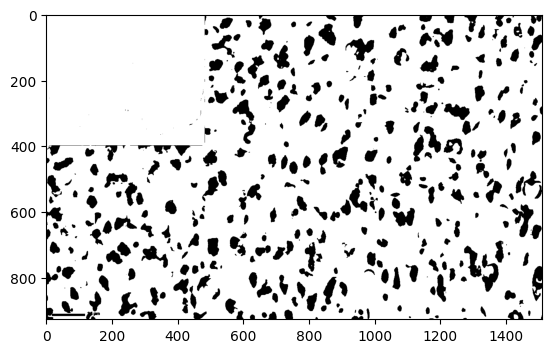

In [25]:
imagepath = '/Users/tgong/Work/Projects/BrainDevelopment/Histo_Data/BrainHack/'

histo_roi_analysis(imagepath , 'caudate.png', 150)